## 6.2 The PyTorch nn module

In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn as nn

In [4]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) # <1>
t_u = torch.tensor(t_u).unsqueeze(1) # <1>

t_u.shape

torch.Size([11, 1])

In [5]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([ 1,  7, 10,  0,  5,  3,  9,  4,  6]), tensor([2, 8]))

In [6]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [7]:
linear_model = nn.Linear(1, 1)
linear_model(t_un_val)

tensor([[-6.5186],
        [-5.5849]], grad_fn=<AddmmBackward>)

In [8]:
print('linear_model.weight\n', linear_model.weight)
print()
print('linear_model.bias\n', linear_model.bias)

linear_model.weight
 Parameter containing:
tensor([[-0.9528]], requires_grad=True)

linear_model.bias
 Parameter containing:
tensor([-0.9733], requires_grad=True)


In [9]:
x = torch.ones(1)
linear_model(x)

tensor([-1.9261], grad_fn=<AddBackward0>)

In [10]:
x = torch.ones(10, 1)
linear_model(x)

tensor([[-1.9261],
        [-1.9261],
        [-1.9261],
        [-1.9261],
        [-1.9261],
        [-1.9261],
        [-1.9261],
        [-1.9261],
        [-1.9261],
        [-1.9261]], grad_fn=<AddmmBackward>)

In [11]:
linear_model = nn.Linear(1, 1)
optimizer = torch.optim.SGD(linear_model.parameters(), lr=1e-2)

In [12]:
linear_model.parameters()

<generator object Module.parameters at 0x0000023A4C764B30>

In [13]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[0.4651]], requires_grad=True),
 Parameter containing:
 tensor([-0.7148], requires_grad=True)]

In [14]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val, t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)
                            
        t_p_val = model(t_u_val)
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        
        if epoch == 1 or epoch % 1000 == 0:
            print(f"epoch {epoch}, Training loss {loss_train.item(): .4f},"
                  f" Validation loss {loss_val.item(): .4f}")

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [15]:
linear_model = nn.Linear(1, 1)
optimizer = torch.optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 3000,
    optimizer = optimizer,
    model = linear_model,
    loss_fn = nn.MSELoss(),
    #loss_fn = loss_fn,
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val
)

print()
print(linear_model.weight)
print(linear_model.bias)

epoch 1, Training loss  156.4997, Validation loss  97.1426
epoch 1000, Training loss  3.1123, Validation loss  5.6068
epoch 2000, Training loss  2.6244, Validation loss  4.6796
epoch 3000, Training loss  2.6159, Validation loss  4.5642

Parameter containing:
tensor([[5.3058]], requires_grad=True)
Parameter containing:
tensor([-16.8036], requires_grad=True)


## 6.3 Finally a neural network

In [16]:
seq_model = nn.Sequential(
    nn.Linear(1, 15),
    nn.Tanh(),
    nn.Linear(15, 1))
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=15, bias=True)
  (1): Tanh()
  (2): Linear(in_features=15, out_features=1, bias=True)
)

In [17]:
[param.shape for param in seq_model.parameters()]

[torch.Size([15, 1]), torch.Size([15]), torch.Size([1, 15]), torch.Size([1])]

In [18]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([15, 1])
0.bias torch.Size([15])
2.weight torch.Size([1, 15])
2.bias torch.Size([1])


In [19]:
from collections import OrderedDict

seq_model_2 = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
]))
seq_model_2

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [20]:
for name, param in seq_model_2.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [21]:
print("seq_model[0].bias\n", seq_model[0].bias)
print()
print("seq_model_2.output_linear.bias\n", seq_model_2.output_linear.bias)

seq_model[0].bias
 Parameter containing:
tensor([ 0.0228, -0.7001, -0.4368,  0.6506, -0.6631,  0.1057,  0.8928, -0.1837,
         0.5595, -0.2157, -0.6915,  0.5093,  0.9806,  0.5705,  0.6848],
       requires_grad=True)

seq_model_2.output_linear.bias
 Parameter containing:
tensor([-0.2211], requires_grad=True)


In [23]:
optimizer = torch.optim.SGD(seq_model_2.parameters(), lr=1e-3)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    model = seq_model_2,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val
)

print('output', seq_model_2(t_un_val))
print('answer', t_c_val)
print('hidden', seq_model_2.hidden_linear.weight.grad)

epoch 1, Training loss  193.1374, Validation loss  123.0156
epoch 1000, Training loss  5.0720, Validation loss  3.6518
epoch 2000, Training loss  4.6790, Validation loss  5.2786
epoch 3000, Training loss  2.5212, Validation loss  2.2792
epoch 4000, Training loss  1.8729, Validation loss  2.0876
epoch 5000, Training loss  1.6842, Validation loss  2.3536
output tensor([[13.2330],
        [ 7.4104]], grad_fn=<AddmmBackward>)
answer tensor([[15.],
        [ 6.]])
hidden tensor([[-0.1691],
        [-0.1397],
        [-3.0086],
        [ 0.0651],
        [ 3.4464],
        [-0.1536],
        [-3.5833],
        [ 3.4867]])


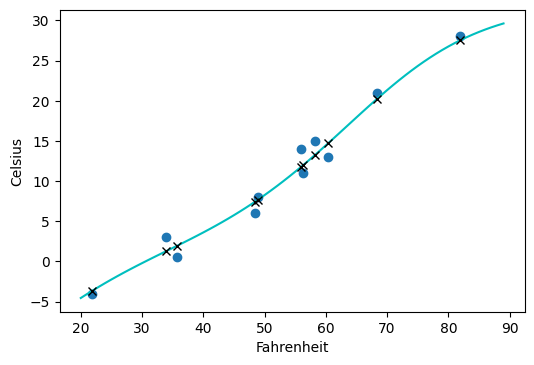

In [24]:
t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi = 100)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model_2(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model_2(0.1 * t_u).detach().numpy(), 'kx')

## Exercise 1: Experiment with the number of hidden neurons in our simple neural network model, as well as the learning rate.
### a. What changes result in more linear output from the model?
### b. Can you get the model to obviously overfit the data?

a.
The output becomes more linear when increases when increasing number of neurons, and the learning rate.
b.
But the model cannot overfit the data obviously.

epoch 1, Training loss  217.8980, Validation loss  147.9609
epoch 1000, Training loss  3.2991, Validation loss  3.4388
epoch 2000, Training loss  2.1804, Validation loss  2.7199
epoch 3000, Training loss  2.2570, Validation loss  3.1656
epoch 4000, Training loss  1.9611, Validation loss  3.0481
epoch 5000, Training loss  1.8349, Validation loss  3.0159
epoch 6000, Training loss  1.7566, Validation loss  2.9762
epoch 7000, Training loss  1.7137, Validation loss  2.9517
epoch 8000, Training loss  1.6915, Validation loss  2.9436
epoch 9000, Training loss  1.6785, Validation loss  2.9409
epoch 10000, Training loss  1.6688, Validation loss  2.9349


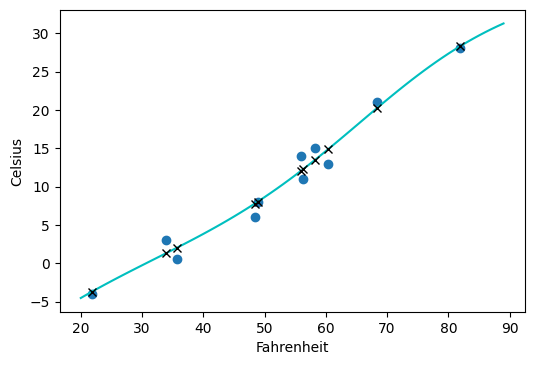

In [25]:
print("a.")
print("The output becomes more linear when increases when increasing number of neurons, and the learning rate.")
print("b.")
print("But the model cannot overfit the data obviously.")

print()
seq_model_exc = nn.Sequential(
    nn.Linear(1, 20),
    #nn.Tanh(),
    #nn.Linear(20, 20),
    nn.Tanh(),
    nn.Linear(20, 1))

optimizer = torch.optim.SGD(seq_model_exc.parameters(), lr=1e-3)

training_loop(
    n_epochs = 10000,
    optimizer = optimizer,
    model = seq_model_exc,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val
)

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi = 100)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model_exc(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model_exc(0.1 * t_u).detach().numpy(), 'kx')

## Exercise 2: The third-hardest problem in physics is finding a proper wine to celebrate discoveries. Load the wine data from chapter 4, and create a new model with the appropriate number of input parameters.
### a. How long does it take to train compared to the temperature data we have been using?
Longer
### b. Can you explain what factors contribute to the training times?
- The structure of the neural network.
- The size of the dataset.
- Optimizer.

### c. Can you get the loss to decrease while training on this dataset?
Yes. But the data is not good enough.

### d. How would you go about graphing this dataset?
Done.

In [183]:
import csv
wine_path = "data/sheets/winequality-white.csv"
wineq_numpy = np.loadtxt(wine_path, dtype=np.float32, delimiter=";",
                         skiprows=1)

In [200]:
col_list = next(csv.reader(open(wine_path), delimiter=';'))
feature = 6
wineq_numpy.shape, col_list

((4898, 12),
 ['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol',
  'quality'])

In [201]:
wineq = torch.from_numpy(wineq_numpy)
wineq.shape, wineq.dtype

(torch.Size([4898, 12]), torch.float32)

In [202]:
wine_data = wineq[:, feature].unsqueeze(1)
print(f"wine_data\n{wine_data}\n{wine_data.shape}")
print()
wine_result = wineq[:, 11].unsqueeze(1)
print(f"wine_result\n{wine_result}\n{wine_result.shape}")

wine_data
tensor([[170.],
        [132.],
        [ 97.],
        ...,
        [111.],
        [110.],
        [ 98.]])
torch.Size([4898, 1])

wine_result
tensor([[6.],
        [6.],
        [6.],
        ...,
        [6.],
        [7.],
        [6.]])
torch.Size([4898, 1])


In [203]:
n_samples = wine_data.shape[0]
n_val = int(0.4 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices.shape, val_indices.shape

(torch.Size([2939]), torch.Size([1959]))

In [204]:
wine_data_train = wine_data[train_indices]
wine_result_train = wine_result[train_indices]

wine_data_val = wine_data[val_indices]
wine_result_val = wine_result[val_indices]

#wine_datan_train = wine_data_train/max(wine_data)
#wine_datan_val = wine_data[val_indices]/max(wine_data)
#wine_datan_train = wine_data_train/max(wine_data)
#wine_datan_val = wine_data[val_indices]/max(wine_data)
wine_datan_train = wine_data_train
wine_datan_val = wine_data[val_indices]

#t_un_train = 0.1 * t_u_train
#t_un_val = 0.1 * t_u_val

In [205]:
def training_loop(n_epochs, optimizer, model, loss_fn, data_train, data_val, result_train, result_val):
    for epoch in range(1, n_epochs + 1):
        predict_train = model(data_train)
        loss_train = loss_fn(predict_train, result_train)
                            
        predict_val = model(data_val)
        loss_val = loss_fn(predict_val, result_val)
        
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        
        if epoch == 1 or epoch % 200 == 0:
            print(f"epoch {epoch}, Training loss {loss_train.item(): .4f},"
                  f" Validation loss {loss_val.item(): .4f}")

In [214]:
seq_model_wine = nn.Sequential(
    nn.Linear(1, 50),
    nn.Tanh(),
    nn.Linear(50, 200),
    nn.Tanh(),
    nn.Linear(200, 1))

optimizer = torch.optim.SGD(seq_model_wine.parameters(), lr=1e-3)

training_loop(
    n_epochs = 1000,
    optimizer = optimizer,
    model = seq_model_wine,
    loss_fn = nn.MSELoss(),
    data_train = wine_datan_train,
    data_val = wine_datan_val,
    result_train = wine_result_train,
    result_val = wine_result_val
)

epoch 1, Training loss  35.1583, Validation loss  34.9240
epoch 200, Training loss  0.7817, Validation loss  0.7852
epoch 400, Training loss  0.7813, Validation loss  0.7852
epoch 600, Training loss  0.7810, Validation loss  0.7853
epoch 800, Training loss  0.7809, Validation loss  0.7855
epoch 1000, Training loss  0.7809, Validation loss  0.7854


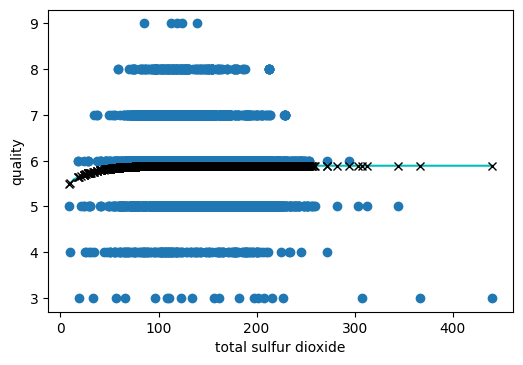

In [215]:
wine_range = torch.linspace(wine_data.min(), wine_data.max(), 101).unsqueeze(1)

fig = plt.figure(dpi = 100)
plt.xlabel(col_list[feature])
plt.ylabel('quality')
plt.plot(wine_data.numpy(), wine_result.numpy(), 'o')
plt.plot(wine_range.numpy(), seq_model_wine(wine_range).detach().numpy(), 'c-')
plt.plot(wine_data.numpy(), seq_model_wine(wine_data).detach().numpy(), 'kx')

#t_range = torch.arange(20., 90.).unsqueeze(1)

#fig = plt.figure(dpi = 100)
#plt.xlabel("Fahrenheit")
#plt.ylabel("Celsius")
#plt.plot(t_u.numpy(), t_c.numpy(), 'o')
#plt.plot(t_range.numpy(), seq_model_wine(0.1 * t_range).detach().numpy(), 'c-')
#plt.plot(t_u.numpy(), seq_model_wine(0.1 * t_u).detach().numpy(), 'kx')